In [1]:
# RUN THIS CELL TO IMPORT KAGGLE DATA SOURCES

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'simple-dialogs-for-chatbot:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F715041%2F1245709%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240716%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240716T104306Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D85cf9de5a287db8f7e24ec37d9b2bcb5a23f1a76c855345233d8165ff88c101432befee1068d787d7fe51f783c141c0ac2233ea32a5295f3e5bd795c96007c9b6986bd790e0e0daf1442fa763ff338a16e1916c4bd57bebbc647b5025b72a9a6f685b98faa03c1f5170d342662b43f84a6c48f58760f1f41b81aab57d0b9e603dd143d3cfe7cd44ae430f79df96045ff5fcfe16e7b4fccbb32d11858b2eeb15940a921aa6afade953e6a086aa65c00c957b4f0d78858a3a23c95ff702a16ea7e2d4a59be2516ce1c2d1b118127df9a7694f98bf990abb007d7cae433215a80c9f0e7885dbdc06e8415478e2949260659ca399bb09ea57848282653b90d4bc808'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 60740 bytes downloaded
Downloaded and uncompressed: simple-dialogs-for-chatbot
Data source import complete.


In [2]:
# !pip uninstall -y torch_xla  # Uninstall the existing PyTorch XLA
# !pip install google-api-python-client google-api-core
!pip install cloud-tpu-client torch torchtext torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116
!pip install transformers datasets rouge_score loralib peft


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-many

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 29.6 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=9b60f21b7fa207d1f5d49df38b785edf09ec82fe05884ed248784eb7907f386b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
  A

## <b>1 <span style='color:#9146ff'>|</span> Import Libraries and Dataset</b>

In [1]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
# import evaluate

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [2]:
columns = ['question', 'answer']

df = pd.read_csv('../input/simple-dialogs-for-chatbot/dialogs.txt', sep='\t', names=columns)

# Now df will have columns named 'question' and 'answer'
df.head()

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [3]:
!pip install wordcloud

## <b>2 <span style='color:#9146ff'>|</span> EDA</b>

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 2.1. Basic Exploration:

* Check the data types of columns.
* Get an overview of the dataset's shape (number of rows and columns).
* Check for any missing values.

In [5]:
print("\nData types of columns:")
print(df.dtypes)
print("\nShape of the dataset:")
print(df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Data types of columns:
question    object
answer      object
dtype: object

Shape of the dataset:
(3725, 2)

Missing values:
question    0
answer      0
dtype: int64


### 2.2. Text Analysis:

* Analyze the length distribution of questions and answers.
* Check for any unusual characters or patterns in the text.
* Explore the most common words or phrases in questions and answers (word frequency analysis).

In [6]:
# Length distribution of questions and answers
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

### 2.3. Visualization:

* Create visualizations to better understand the data distribution (e.g., histograms, word clouds).
* Plot the distribution of question and answer lengths.
* Visualize word frequency using bar plots or word clouds.

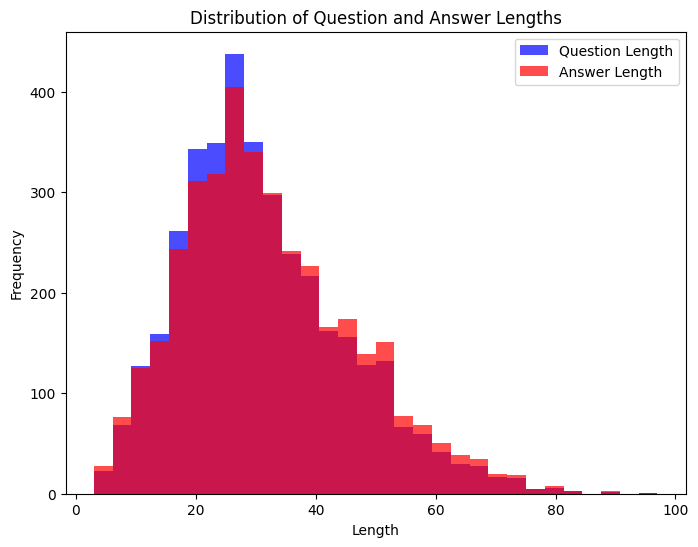

In [7]:
# Visualization
plt.figure(figsize=(8, 6))
plt.hist(df['question_length'], bins=30, alpha=0.7, color='blue', label='Question Length')
plt.hist(df['answer_length'], bins=30, alpha=0.7, color='red', label='Answer Length')
plt.title('Distribution of Question and Answer Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

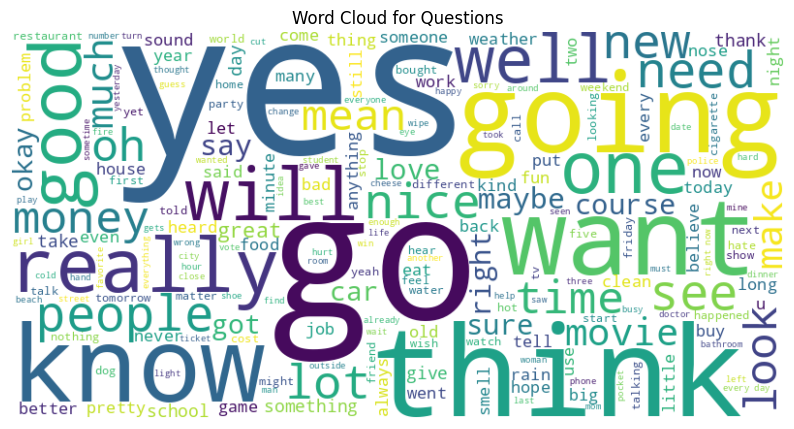

In [8]:
# Word cloud for questions
question_text = ' '.join(df['question'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

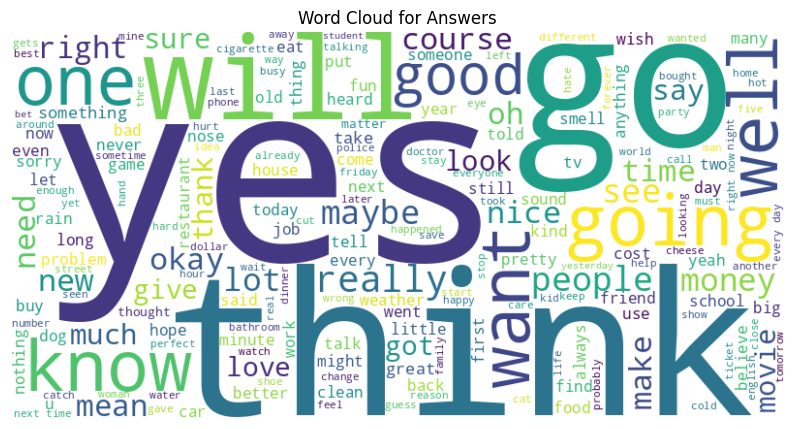

In [9]:
# Word cloud for answers
answer_text = ' '.join(df['answer'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(answer_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()

In [10]:
!pip install textblob

In [11]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

### 2.4. Topic Modeling:

* Use techniques like Latent Dirichlet Allocation (LDA) to identify underlying topics in the questions and answers.
* Cluster similar questions and answers based on topic distributions.

In [12]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['question'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# Display the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:", ", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]))


Topic 0: think, really, time, maybe, mean, ve, ll, better, let, doing
Topic 1: like, yes, want, didn, day, right, say, does, going, just
Topic 2: good, know, don, need, sure, course, great, job, new, haven
Topic 3: did, people, lot, school, don, today, really, yes, oh, think
Topic 4: ll, going, okay, nice, money, got, just, think, make, car


### 2.5. Language Complexity:

* Measure the complexity of language used in questions and answers (e.g., average word length, vocabulary richness).
* Explore readability scores or linguistic features.

In [13]:
df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
df['answer_word_count'] = df['answer'].apply(lambda x: len(x.split()))

# Analyze language complexity
avg_question_word_length = df['question'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()
avg_answer_word_length = df['answer'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()

print("\nAverage word length in questions:", avg_question_word_length)
print("Average word length in answers:", avg_answer_word_length)


Average word length in questions: 4.166015845093442
Average word length in answers: 4.175336153968232


## <b>3 <span style='color:#9146ff'>|</span> Data Preprocessing</b>

### 3.1. Data Augmentation (UPSampling)

In [14]:
# Define the new dialogue data
new_dialogue_data = [
    ["Hi", "Hello"],
    ["How are you?", "I'm good, thanks for asking. How about you?"],
    ["I'm doing well too.", "That's great to hear. What have you been up to lately?"],
    ["Not much, just working and spending time with family.", "That sounds nice. Have you watched any good movies recently?"],
    ["Yeah, I saw a really good one last weekend.", "It was a thriller, right? I heard good things about it."],
    ["Yes, it was.", "Do you want to watch it together sometime?"],
    ["Sure, that sounds like a plan.", "Awesome! Let's plan it for this weekend."],
    ["Sounds good to me.", "Alright then, it's a plan. What time works for you?"],
    ["How about Saturday evening?", "Perfect! Saturday evening it is. I'll book the tickets."],
    ["Great! Looking forward to it.", "Me too. It'll be fun."],
    ["I love you.", "I love you 3000."]
]
new_df = pd.DataFrame(new_dialogue_data, columns=columns)

# Concatenate the new DataFrame with the existing DataFrame
df = pd.concat([df, new_df], ignore_index=True)

# Print the updated DataFrame
df

,question,answer,question_length,answer_length,question_word_count,answer_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22.0,29.0,5.0,5.0
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29.0,35.0,5.0,6.0
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35.0,33.0,6.0,7.0
3,no problem. so how have you been?,i've been great. what about you?,33.0,32.0,7.0,6.0
4,i've been great. what about you?,i've been good. i'm in school right now.,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3731,"Sure, that sounds like a plan.",Awesome! Let's plan it for this weekend.,NaN,NaN,NaN,NaN
3732,Sounds good to me.,"Alright then, it's a plan. What time works for...",NaN,NaN,NaN,NaN
3733,How about Saturday evening?,Perfect! Saturday evening it is. I'll book the...,NaN,NaN,NaN,NaN
3734,Great! Looking forward to it.,Me too. It'll be fun.,NaN,NaN,NaN,NaN


### 3.2. Preprocessing
* Lowercase
* Tokenization
* Stop words removal
* Lemmization

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word.isalnum()]
#     preprocessed_text = ' '.join(tokens)

    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,question,answer,question_length,answer_length,question_word_count,answer_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22.0,29.0,5.0,5.0
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29.0,35.0,5.0,6.0
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35.0,33.0,6.0,7.0
3,no problem. so how have you been?,i've been great. what about you?,33.0,32.0,7.0,6.0
4,i've been great. what about you?,i've been good. i'm in school right now.,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3731,"sure, that sounds like a plan.",awesome! let's plan it for this weekend.,NaN,NaN,NaN,NaN
3732,sounds good to me.,"alright then, it's a plan. what time works for...",NaN,NaN,NaN,NaN
3733,how about saturday evening?,perfect! saturday evening it is. i'll book the...,NaN,NaN,NaN,NaN
3734,great! looking forward to it.,me too. it'll be fun.,NaN,NaN,NaN,NaN


## <b>4 <span style='color:#9146ff'>|</span> Classical ML ChatBot</b>

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df['question'], preprocessed_df['answer'], test_size=0.2, random_state=42, shuffle=True)

### 4.1. Model Pipline and training

In [17]:
import time

Pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

start_time = time.time()

Pipe.fit(X_train, y_train)


training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 111.42 seconds


In [18]:
Pipe.predict(['where are you going'])[0]

'into the mountains.'

### 4.2. Model Evaluation

In [19]:
# Predicting text using the pipeline on the test set
predicted_text = Pipe.predict(X_test)

# Creating a DataFrame to compare the first 10 results
comparison_df = pd.DataFrame({'Real Question ': X_test[:10],'Real Generated Text': y_test[:10], 'Predicted Text': predicted_text[:10]})
comparison_df.head(10)

,Real Question,Real Generated Text,Predicted Text
3254,i started shopping at the dollar store.,that saves a lot of money.,how much is it?
3388,he made promises that he didn't keep.,like what?,that's true. they promise anything just so the...
1546,it should have a pretty woman on it.,that's ridiculous!,what woman?
3403,all you have to do is vote and put a stamp on it.,how easy is that?,"give me the envelope, and i'll mail it for you."
642,"i really wanted you to come, but i understand.","yeah, maybe next time.",i have things to do.
1873,are you going to wash it yourself?,of course. it's not a hard job.,i washed the sheets and towels.
184,she's one of the prettiest girls at the school.,what does she look like?,maybe we should learn some good jokes.
1402,but it was full of pencils! how could he say i...,artists see things differently.,the artist said the jar was both full and empty.
2381,his nails were black!,that's disgusting.,what's the matter?
3411,"oh, yeah. he's changing it to a basketball court.",who's paying for that?,"no, i couldn't make it."


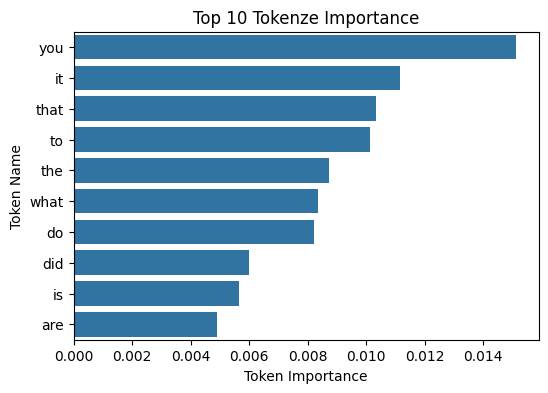

In [20]:
import seaborn as sns

# Visualize Feature Importance
if isinstance(Pipe.named_steps['classifier'], RandomForestClassifier):
    feature_importances = Pipe.named_steps['classifier'].feature_importances_
    feature_names = Pipe.named_steps['tfidf'].get_feature_names_out()

    # Sort feature importances
    sorted_indices = feature_importances.argsort()[::-1]
    top_feature_importances = feature_importances[sorted_indices][:10]
    top_feature_names = np.array(feature_names)[sorted_indices][:10]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_feature_importances, y=top_feature_names)
    plt.xlabel('Token Importance')
    plt.ylabel('Token Name')
    plt.title('Top 10 Tokenze Importance')
    plt.show()


### 4.3. Chat with you ChatBot :D

In [21]:
# Function to get response from chatbot
def get_response(question):
    response = Pipe.predict([question])[0]
    return response

# Function to interact with the user
def chat():
    while True:
        question = input("You: ")
        if question.lower() == 'quit':
            print("Chatbot: Goodbye!")
            break
        response = get_response(question)
        print("Chatbot:", response)

# Start the chat
chat()

You: hi
Chatbot: hello
You: want to eat?
Chatbot: i don't know. look in the fridge.
You: need food?
Chatbot: what was your last job?
You: i love you
Chatbot: i love you 3000.
You: lets go
Chatbot: i hope that i'll see you there.
You: quit
Chatbot: Goodbye!


# Save the model

In [22]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
import time
import joblib

start_time = time.time()

# Save the model
joblib.dump(Pipe, 'modelX.pkl')

save_time = time.time() - start_time
print(f"Model save time: {save_time:.2f} seconds")

Model save time: 349.07 seconds


# Use it from saved Model

In [ ]:
import joblib

# Load the saved model
loaded_model = joblib.load('modelX.pkl')

# Predicting text using the pipeline on the test set
predicted_text = loaded_model.predict(X_test)

# Creating a DataFrame to compare the first 10 results
comparison_df = pd.DataFrame({'Real Question ': X_test[:10],'Real Generated Text': y_test[:10], 'Predicted Text': predicted_text[:10]})
comparison_df.head(10)

# loaded_model.predict(['where are you going'])[0]
